In [1]:
!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
from pycocotools.coco import COCO
import pandas as pd 
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path

В датасете всего 50 изображений. На каждом изображении может находится несколько персонажей, которые относятся к разным категориям.

In [10]:
dataDir=Path('./drive/MyDrive/Persanal Study/train')
annFile = Path('./drive/MyDrive/Persanal Study/train/_annotations.coco.json')
coco = COCO(annFile)
imgIds = coco.getImgIds()
cats = coco.loadCats(coco.getCatIds())
annotations = coco.loadAnns(coco.getAnnIds())
category_ids = [t['category_id'] for t in annotations]
from collections import Counter
print("Количество картинок, соответсвующих классам:")
print(Counter(category_ids).values())

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Количество картинок, соответсвующих классам:
dict_values([21, 14, 13, 13])


In [11]:
categories = [cat['name'] for cat in cats]
print(f"\nКоличество категорий: {len(categories)}\n")
print(f"Категории: {categories}")


Количество категорий: 5

Категории: ['Shrek-characters', 'donkey', 'fiona', 'pussInBoots', 'shrek']


Вывод примеров разметки

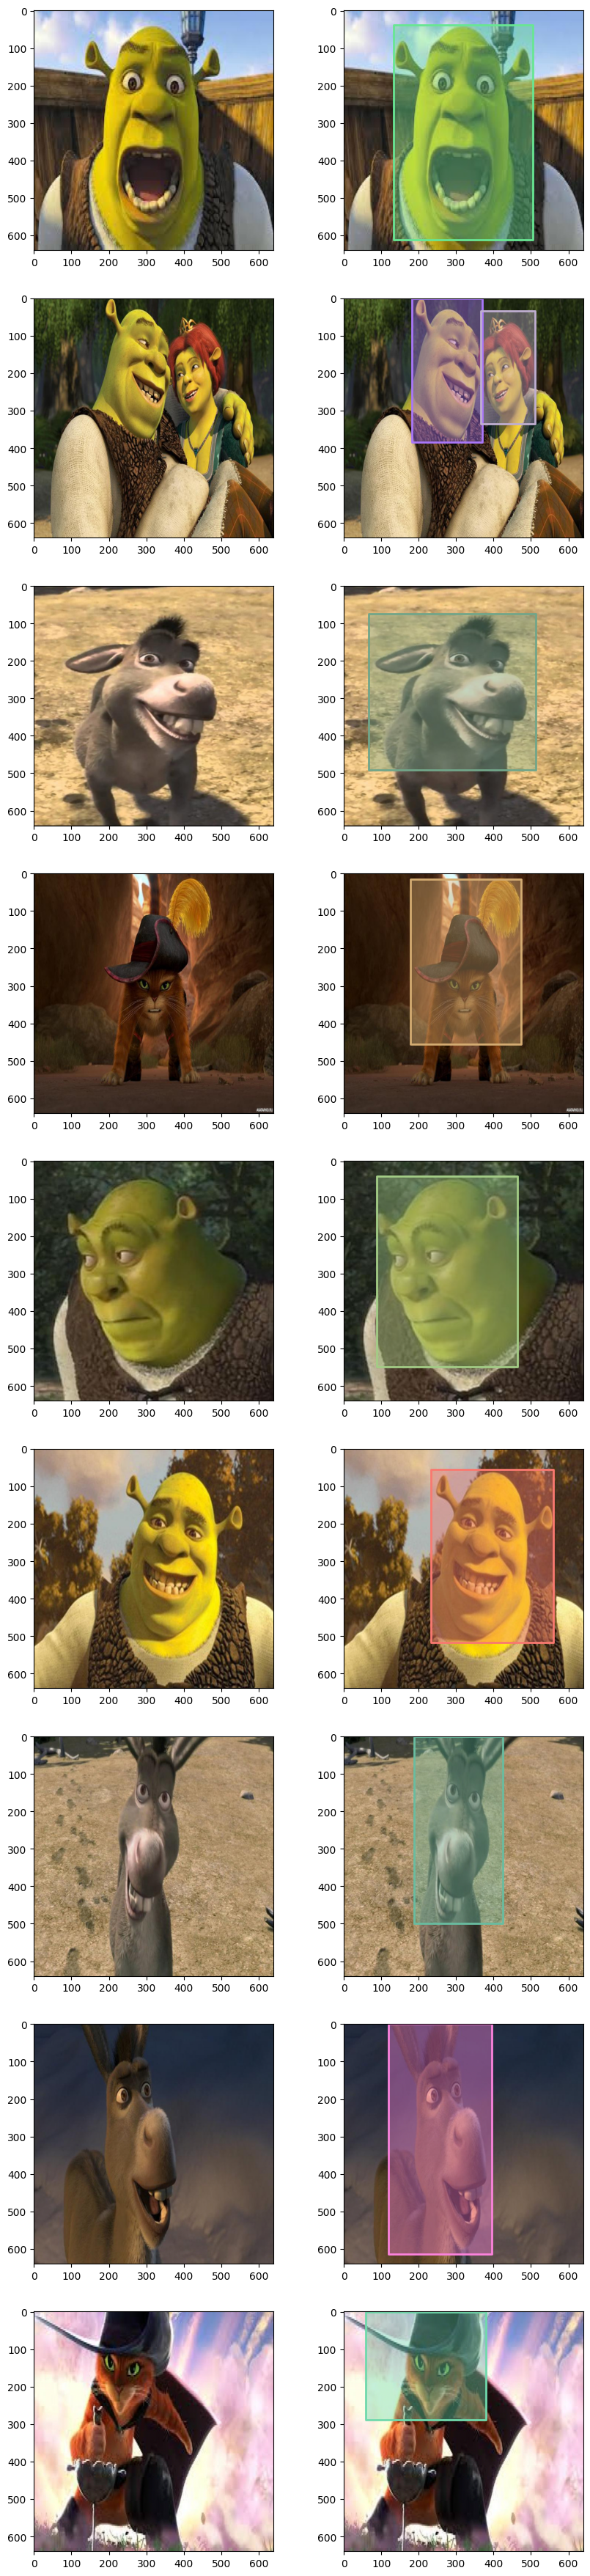

In [9]:
imgs = coco.loadImgs(imgIds[7:16])
_,axs = plt.subplots(len(imgs),2,figsize=(10,5 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = io.imread(dataDir/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)